<center>


 # **Optimizing Business Strategy: In-Depth Analysis of Sales Performance Data**   
</center>


### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv("International sale Report.csv")
df

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...,...,...,...
37427,37427,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37428,37428,AVIN,03-31-22,Mar-22,PJNE3404,PJNE3404-KR-4XL,1.00,500.00,500.00,5.00
37429,37429,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37430,37430,AVIN,03-31-22,Mar-22,SET290,SET290-KR-DPT-M,1.00,812.50,812.00,7.00


In [3]:
# Display column data types
print(df.dtypes)

index         int64
DATE         object
Months       object
CUSTOMER     object
Style        object
SKU          object
Size         object
PCS          object
RATE         object
GROSS AMT    object
dtype: object


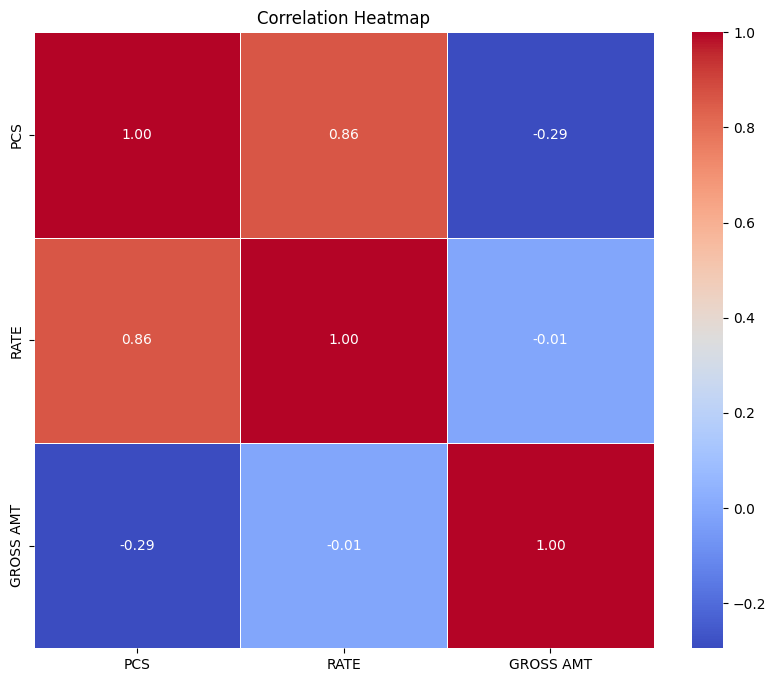

In [4]:
# Convert specific columns to numeric types
df['PCS'] = pd.to_numeric(df['PCS'], errors='coerce')
df['RATE'] = pd.to_numeric(df['RATE'], errors='coerce')
df['GROSS AMT'] = pd.to_numeric(df['GROSS AMT'], errors='coerce')

# Select numeric columns for correlation
numeric_columns = ['PCS', 'RATE', 'GROSS AMT']  # Adjust with other numeric columns as needed

# Compute correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.savefig("CH Map.png")
plt.show()

### Display descriptive statistics

In [5]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
              index           PCS          RATE     GROSS AMT
count  37432.000000  36391.000000  36391.000000  36391.000000
mean   18715.500000    402.218069    830.343325    450.539946
std    10805.831975    956.320592    960.089506    597.808652
min        0.000000      1.000000    100.000000      0.000000
25%     9357.750000      1.000000    462.500000     11.000000
50%    18715.500000      5.000000    646.000000    340.000000
75%    28073.250000    587.500000    925.000000    681.000000
max    37431.000000  57400.000000  57400.000000   9745.000000


# **4. Data visualization**

### Histogram of Gross Amount

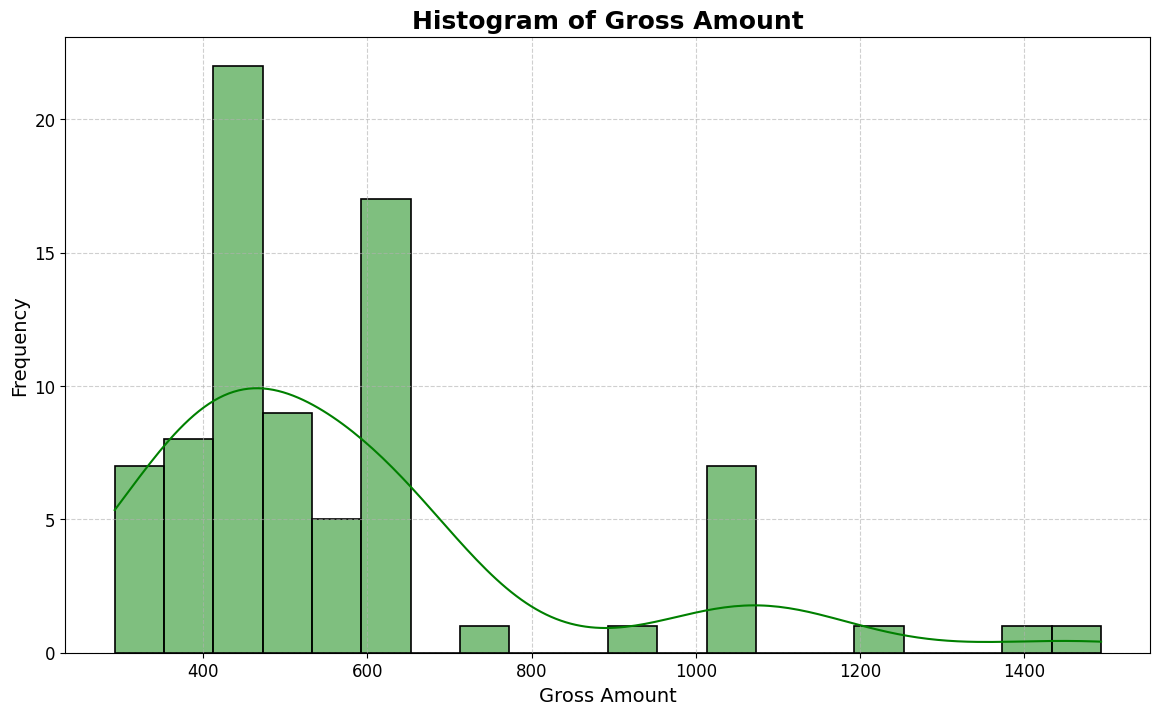

In [18]:
plt.figure(figsize=(14, 8))

# Enhanced histogram with KDE plot
sns.histplot(df['GROSS AMT'].head(80), bins=20, kde=True, color='green', edgecolor='black', linewidth=1.2)

# Add titles and labels
plt.title("Histogram of Gross Amount", fontsize=18, fontweight='bold')
plt.xlabel("Gross Amount", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure
plt.savefig("2.png")

# Display the plot
plt.show()


### Line chart of Quantity Sold (PCS) vs. Gross Amount (GROSS AMT) for the top 10 values

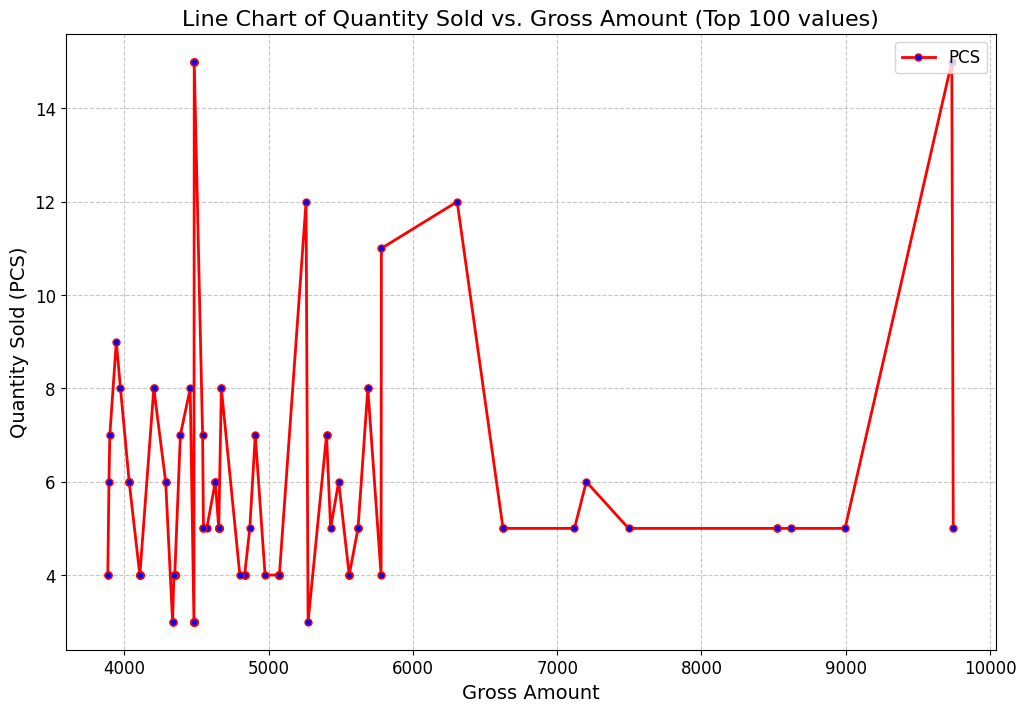

In [17]:
# Sort the DataFrame by 'GROSS AMT' in descending order and then by 'PCS' in descending order, and select the top 100 rows
top_100_df = df.sort_values(by=['GROSS AMT', 'PCS'], ascending=False).head(100)

plt.figure(figsize=(12, 8))

# Plot with enhancements
plt.plot(top_100_df['GROSS AMT'], top_100_df['PCS'], marker='o', linestyle='-', color='red', linewidth=2, markersize=5, markerfacecolor='blue')

plt.title("Line Chart of Quantity Sold vs. Gross Amount (Top 100 values)", fontsize=16)
plt.xlabel("Gross Amount", fontsize=14)
plt.ylabel("Quantity Sold (PCS)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a legend
plt.legend(['PCS'], loc='upper right', fontsize=12)

# Enhancing x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("3.png")
plt.show()


### Pie Chart of top 10 records for 'GROSS AMT' and 'PCS'

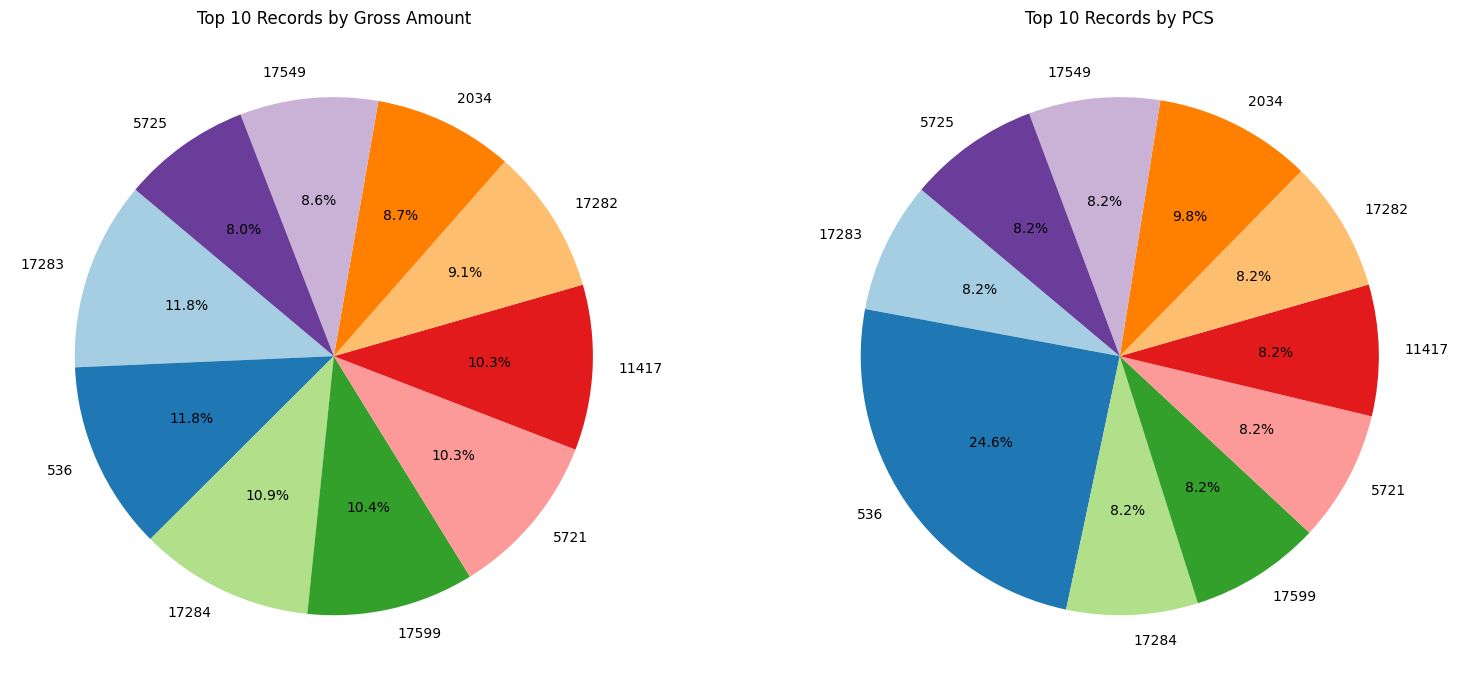

In [22]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'GROSS AMT' in descending order and then by 'PCS' in descending order, and select the top 10 rows
top_10_df = df.sort_values(by=['GROSS AMT', 'PCS'], ascending=False).head(10)

# Create pie chart for 'GROSS AMT'
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.pie(top_10_df['GROSS AMT'], labels=top_10_df.index + 1, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(top_10_df))))
plt.title('Top 10 Records by Gross Amount')

# Create pie chart for 'PCS'
plt.subplot(1, 2, 2)
plt.pie(top_10_df['PCS'], labels=top_10_df.index + 1, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(top_10_df))))
plt.title('Top 10 Records by PCS')

plt.tight_layout()
plt.savefig("4.png")
plt.show()


### Bar Chart of Top 10 Quantity Sold

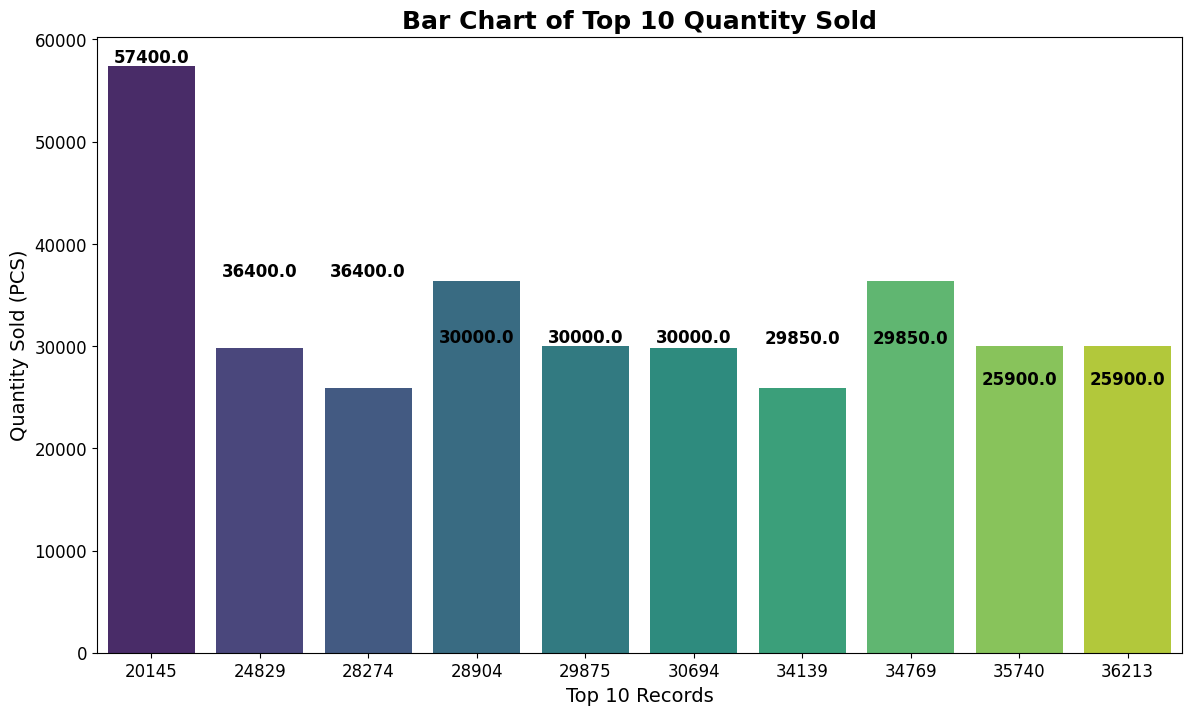

In [21]:
# Sort the DataFrame by 'PCS' in descending order and select the top 10 rows
top_10_pcs = df.sort_values(by='PCS', ascending=False).head(10)

plt.figure(figsize=(14, 8))

# Create a bar chart
colors = sns.color_palette('viridis', len(top_10_pcs))  # Use a colorful palette
sns.barplot(x=top_10_pcs.index + 1, y=top_10_pcs['PCS'], palette=colors, hue=top_10_pcs.index + 1, dodge=False, legend=False)

# Add titles and labels
plt.title("Bar Chart of Top 10 Quantity Sold", fontsize=18, fontweight='bold')
plt.xlabel("Top 10 Records", fontsize=14)
plt.ylabel("Quantity Sold (PCS)", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value annotations on bars
for i, value in enumerate(top_10_pcs['PCS']):
    plt.text(i, value + 5, f'{value}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Save the figure
plt.savefig("5.png")

# Display the plot
plt.show()

In [10]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind

In [11]:
# Convert 'GROSS AMT' and 'RATE' columns to numeric (ignore errors for non-numeric values)
df['GROSS AMT'] = pd.to_numeric(df['GROSS AMT'], errors='coerce')
df['RATE'] = pd.to_numeric(df['RATE'], errors='coerce')

# Drop rows with missing values in 'GROSS AMT' or 'RATE'
df.dropna(subset=['GROSS AMT', 'RATE'], inplace=True)

# Hypothesis Testing for 'GROSS AMT' and 'RATE'
# Calculate mean 'GROSS AMT' for the entire dataset
mean_gross_amt = df['GROSS AMT'].mean()

# Perform one-sample t-test to compare mean 'GROSS AMT' to a hypothetical value (e.g., 0)
t_stat, p_value = stats.ttest_1samp(df['GROSS AMT'], mean_gross_amt)

# Print the p-value
print("P-value for t-test on 'GROSS AMT':", p_value)

# Predictive Modeling for 'GROSS AMT' based on 'RATE'
# Selecting features and target variable
X = df[['RATE']]
y = df['GROSS AMT']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for 'GROSS AMT' prediction:", mse)

P-value for t-test on 'GROSS AMT': 1.0
Mean Squared Error for 'GROSS AMT' prediction: 366454.39524893556


A p-value of 1.0 in the t-test for 'GROSS AMT' suggests that we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the mean 'GROSS AMT' differs significantly from the population mean. However, it's essential to interpret this result cautiously and consider other factors such as sample size and variability.

Regarding the predictive modeling for 'GROSS AMT' based on 'RATE', a mean squared error (MSE) of approximately 366,454 indicates that the linear regression model's predictions have a relatively large error compared to the actual 'GROSS AMT' values. This suggests that the 'RATE' alone may not be a strong predictor of 'GROSS AMT', or there may be non-linear relationships or other variables not captured in the model that influence 'GROSS AMT'.

Interpretation and Insights:

- The non-significant p-value in the t-test implies that there may not be a significant difference in the mean 'GROSS AMT' compared to the population mean. Further investigation may be needed to understand the factors influencing 'GROSS AMT'.
- The relatively high MSE in the predictive modeling suggests that the linear regression model using 'RATE' alone as a predictor may not effectively capture the variability in 'GROSS AMT'. Exploring additional features or more complex models may improve prediction accuracy.
- Overall, these insights can guide further analysis and decision-making processes related to sales strategies, pricing optimization, and customer segmentation.
